In [11]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from scipy.stats import linregress



In [15]:
# Load the combined CSV file
combined_df = pd.read_csv("combined_csv.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential,square_miles,pop_density
0,0,42,Pennsylvania,12794885,40.9,63627,35518,1480430,11.570483,2.745222,...,13.472963,0.001050,150700,4270226,8238,2.025491e+05,3.715775,13.64,46055.00,277.817501
1,1,6,California,39346023,36.7,78672,38576,4853434,12.335259,3.123769,...,13.409571,0.030414,362850,12542060,625476,1.576803e+07,5.128937,16.99,163696.00,240.360320
2,2,54,West Virginia,1807426,42.7,48037,27346,300152,16.606600,2.878735,...,12.860153,0.000000,95600,714719,499,1.122905e+04,3.786638,10.08,24038.00,75.190365
3,3,49,Utah,3151239,31.1,74197,30986,283360,8.992019,1.835119,...,13.952787,0.010257,208200,795526,11149,2.535065e+05,4.688451,10.88,84899.00,37.117504
4,4,36,New York,19514849,39.0,71117,40898,2581048,13.226072,2.923774,...,13.655858,0.001493,354650,6925678,52873,1.366822e+06,3.821709,18.54,54556.00,357.703076
5,5,11,District of Columbia,701974,34.1,90842,58659,103391,14.728608,4.172519,...,14.799600,0.006762,432800,240110,1833,4.590642e+04,3.984444,12.99,68.34,10271.788120
6,7,12,Florida,21216924,42.2,57703,32848,2772939,13.069468,2.621082,...,13.457360,0.006778,143100,7269480,140081,3.717083e+06,4.827880,11.58,65758.00,322.651601
7,8,45,South Carolina,5091517,39.7,54864,30727,726470,14.268243,2.660975,...,13.259044,0.001246,124900,1579901,4569,1.221164e+05,4.379648,12.57,32020.00,159.010525
8,9,38,North Dakota,760394,35.2,65315,36289,77491,10.190901,1.691360,...,13.599465,0.000357,126100,252332,273,5.715009e+03,3.735086,9.62,70705.00,10.754459
9,10,23,Maine,1340825,44.8,59489,33774,144384,10.768296,2.121231,...,13.692059,0.000000,167800,454650,457,9.935729e+03,3.601679,15.61,35385.00,37.892469


In [16]:
# Load the updated and combined CSV file that has further info on rent and solar companies in the state
up_combined_df = pd.read_csv("combined.csv")

# Display sample data
up_combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


The r-value is: 0.012757423326646426


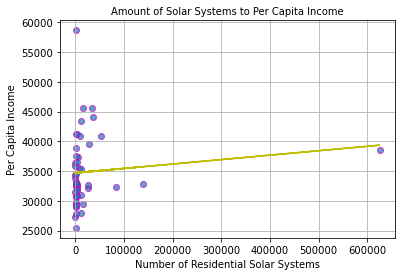

In [60]:
# Graph and linear regression 
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "m")
plt.plot(x_values, regress_values, "y")
plt.annotate(line_eq, (350000, 4.15), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Per Capita Income")
plt.title(f"Amount of Solar Systems to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_PerCapitaIncome.png")

# Show plot
plt.show()

In [ ]:
# Determine states with highest per capita income

combined_df.sort_values(by=["Per Capita Income"], ascending=False)

In [ ]:
# Determine states with hightest poverty rate

combined_df.sort_values(by=["Poverty Rate"], ascending=False)

The r-value is: 0.2912197566340232


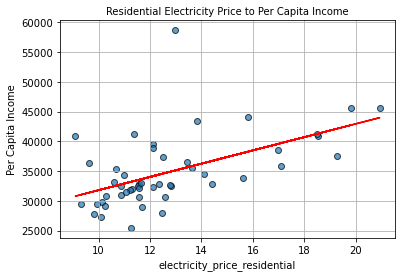

In [5]:
# Graph and linear regression 
x_values = combined_df["electricity_price_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 350000), fontsize = 10, color = "red")
plt.xlabel("electricity_price_residential")
plt.ylabel("Per Capita Income")
plt.title(f"Residential Electricity Price to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

There is a small (.1-.3) positive correlation between Per Capita Income vs Residential Electricity Price.

The r-value is: 0.2938758729082063


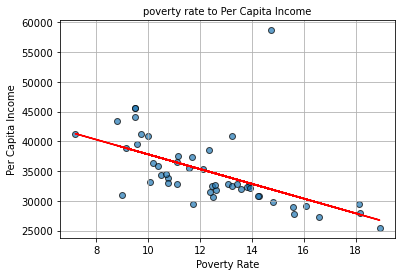

In [6]:
# Graph and linear regression
x_values = combined_df["Poverty Rate"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 350000), fontsize = 10, color = "red")
plt.xlabel("Poverty Rate")
plt.ylabel("Per Capita Income")
plt.title(f"poverty rate to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_povertyRate_vs_PerCapitaIncome.png")

# Show plot
plt.show()

In [9]:
#Take columns 'income' and 'solar system count' and merge them into their own data frame
income_df= combined_df[["Per Capita Income","solar_system_count_residential"]]
income_df.reset_index()
income_df.sort_values(by=["solar_system_count_residential"], ascending=False)

,Per Capita Income,solar_system_count_residential
1,38576,625476
6,32848,140081
15,32340,83476
4,40898,52873
27,44153,36756
21,45555,34626
26,39545,29000
22,32177,27187
44,32629,26572
19,45668,15688


In [51]:
#Take columns 'income' and 'solar system count' and merge them into their own data frame

up_combined_df.sort_values(by=["Per Capita Income"], ascending=False)

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
7,5,11,District of Columbia,38.8899,77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
5,20,9,Connecticut,41.7658,72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
19,23,25,Massachusetts,42.3588,71.0638,6873003,39.6,84385,45555,653454,...,63.2,36.8,672249,31.995646,0.2005,433,3986,1866,5852,146.813849
28,29,34,New Jersey,40.2202,74.7710,8885418,40.0,85245,44153,842704,...,64.4,35.6,662947,25.106902,0.0676,370,4097,2353,6450,157.432267
18,30,24,Maryland,38.8851,76.9158,6037624,38.8,87063,43352,531553,...,67.8,32.2,170049,10.350690,0.0446,176,1504,1446,2950,196.143617
44,31,51,Virginia,37.5387,77.4337,8509358,38.4,76398,41255,826708,...,67.6,32.4,429217,15.678266,0.0499,179,3845,7013,10858,282.392718
27,13,33,New Hampshire,43.2069,71.5381,1355244,43.0,77923,41234,97418,...,72.5,27.5,28327,6.175092,0.0117,55,184,631,815,442.934783
30,4,36,New York,42.6528,73.7572,19514849,39.0,71117,40898,2581048,...,55.4,44.6,632257,9.129171,0.0355,645,3804,8313,12117,318.533123
45,35,53,Washington,38.8899,77.0091,7512465,37.8,77006,40837,751044,...,64.0,36.0,32305,1.328958,0.0035,131,332,1294,1626,489.759036
4,28,8,Colorado,39.7393,104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891


The r-value is: 0.18445662181572217


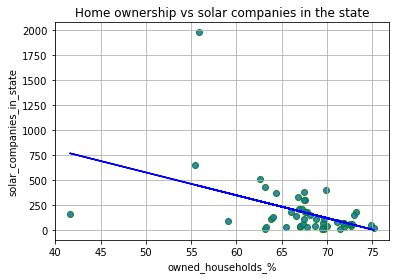

In [29]:
# Graph and linear regression for solar companies in the state 
x_values = up_combined_df["owned_households_%"]
y_values = up_combined_df["solar_companies_in_state"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.9, edgecolors = "g")
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (350000, 350000), fontsize = 12, color = "red")
plt.xlabel("owned_households_%")
plt.ylabel("solar_companies_in_state")
plt.title(f"Home ownership vs solar companies in the state", fontsize = 12)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/LH_owned_vs_solar_comp.png")

# Show plot
plt.show()

The r-value is: 0.18445662181572212


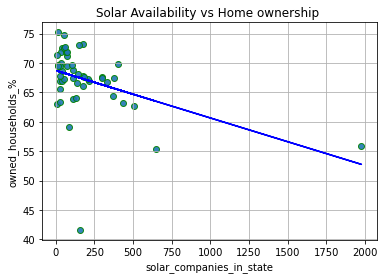

In [31]:
# Graph and linear regression for solar companies in the state 
x_values = up_combined_df["solar_companies_in_state"]
y_values = up_combined_df["owned_households_%"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.9, edgecolors = "g")
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (350000, 350000), fontsize = 12, color = "red")
plt.xlabel("solar_companies_in_state")
plt.ylabel("owned_households_%")
plt.title(f"Solar Availability vs Home ownership ", fontsize = 12)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/LH_owned_vs_solar_comp.png")

# Show plot
plt.show()

In [ ]:
#Take columns 'income' and 'solar system count' and merge them into their own data frame
income_df= combined_df[["Per Capita Income","solar_system_count_residential"]]
income_df.reset_index()
income_df.sort_values(by=["solar_system_count_residential"], ascending=False)

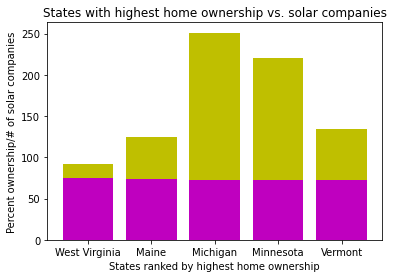

In [66]:
# importing package
import matplotlib.pyplot as plt
 
# create data
x = ['West Virginia', 'Maine', 'Michigan', 'Minnesota', 'Vermont']
y1 = [75, 74, 73, 73, 72]
y2 = [17, 50, 178, 147, 62]
 
# plot bars in stack manner
plt.bar(x, y1, color='m')
plt.bar(x, y2, bottom=y1, color='y')
plt.xlabel("States ranked by highest home ownership")
plt.ylabel ("Percent ownership/# of solar companies")
plt.title("States with highest home ownership vs. solar companies")
plt.show()

Text(0.5, 1.0, 'Top 5 highest PCI - home ownership vs solar avail')

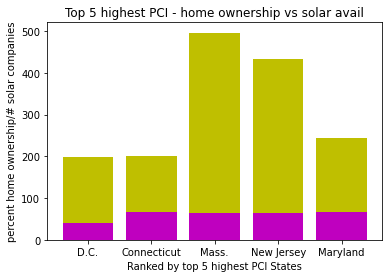

In [68]:
# importing package
import matplotlib.pyplot as plt
 
# create data
highest_per_cap_states = ['D.C.', 'Connecticut', 'Mass.', 'New Jersey', 'Maryland']
home_ownership = [41, 66, 63, 64, 67]
solar_avail = [157, 135, 433, 370, 176]
 
# plot bars in stack manner
plt.show()
plt.bar(highest_per_cap_states, home_ownership, color='m')
plt.bar(highest_per_cap_states, solar_avail, bottom=home_ownership, color='y')
plt.ylabel("percent home ownership/# solar companies")
plt.xlabel("Ranked by top 5 highest PCI States")
plt.title("Top 5 highest PCI - home ownership vs solar avail")